# 直线检测算法
## 再用霍夫函数HoughLines和HoughLinesP检测直线

In [2]:
import cv2   
import numpy as np   
from matplotlib import pyplot as plt 

In [3]:
# 载入图像
img = cv2.imread('line.jfif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #转化成灰度图，形成单一通道

## 霍夫函数cv2.HoughLines，检测图像中分段的直线，但直线会贯穿整个图像

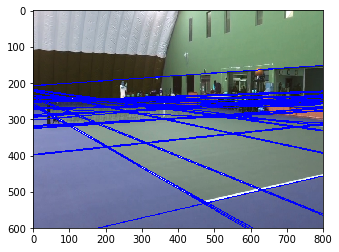

In [4]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)    #先使用canny函数检测出边缘，apertureSize是sobel算子大小，只能为1,3,5，7
lines = cv2.HoughLines(edges, 1, np.pi/180,200)  #HoughLines霍夫直线函数将通过步长为1的半径和步长为π/180的角来搜索所有可能的直线
for line in lines:
    rho,theta = line[0] #获取极值ρ长度和θ角度
    a = np.cos(theta) #获取角度cos值
    b = np.sin(theta) #获取角度sin值
    x0 = a * rho #获取x轴值
    y0 = b * rho #获取y轴值　　x0和y0是直线的中点
    x1 = int(x0 + 1000*(-b)) #获取这条直线最大值点x1
    y1 = int(y0 + 1000*(a)) #获取这条直线最大值点y1
    x2 = int(x0 - 1000 * (-b)) #获取这条直线最小值点x2　　
    y2 = int(y0 - 1000 * (a)) #获取这条直线最小值点y2　　其中*1000是内部规则
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2) #开始划线
plt.imshow(img)

## 霍夫函数的加强版cv2.HoughLinesP，检测图像中分段的直线（而不是贯穿整个图像的直线）

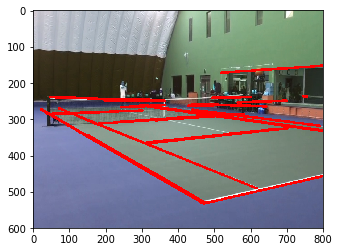

In [5]:
img = cv2.imread('line.jfif')
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=5, maxLineGap=20) #霍夫直线检测函数的加强版,因为图中直线较粗，将角度步长调整为2
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),5)
plt.imshow(img)